                                                    ML MODEL FOR POWER ESTIMATION IN VLSI CIRCUITS                                                                          .

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import metrics



In [3]:
df=pd.read_csv(r"D:\8th sem\major project\vlsi dataset with power.csv")                #loading the file to dataframe

FileNotFoundError: [Errno 2] No such file or directory: 'D:\\8th sem\\major project\\vlsi dataset with power.csv'

In [ ]:
df.head()

,Benchmark circuit,GATE,AND,INV,NOR,NAND,OR,DFF,IN,OUT,Monte Carlo Simulation power in mw.
0,S208,66,21,38,16.0,15,14,8,10,1,0.00698
1,S298,75,31,44,19.0,9,16,14,3,6,0.00912
2,S349,104,44,57,31.0,19,10,15,9,11,0.01856
3,S420,160,49,78,34.0,29,28,16,18,1,0.00903
4,S444,119,13,62,34.0,58,14,21,3,6,0.01172


In [ ]:
df.tail()

,Benchmark circuit,GATE,AND,INV,NOR,NAND,OR,DFF,IN,OUT,Monte Carlo Simulation power in mw.
15,S13207,2573,1114,5378,98.0,849,512,669,31,121,0.35404
16,S15850,3448,1619,6324,151.0,968,710,597,14,87,0.51991
17,S35932,12204,4032,3861,0.0,7020,1152,1728,35,320,1.22048
18,S38417,8709,4154,13470,2279.0,2050,226,1636,28,106,1.14518
19,S38584,11448,5516,7805,NaN,12,278,1452,2621,1185,1.87987


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 11 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Benchmark circuit                    20 non-null     object 
 1   GATE                                 20 non-null     int64  
 2   AND                                  20 non-null     int64  
 3   INV                                  20 non-null     int64  
 4   NOR                                  19 non-null     float64
 5   NAND                                 20 non-null     int64  
 6   OR                                   20 non-null     int64  
 7   DFF                                  20 non-null     int64  
 8   IN                                   20 non-null     int64  
 9   OUT                                  20 non-null     int64  
 10  Monte Carlo Simulation power in mw.  20 non-null     float64
dtypes: float64(2), int64(8), object(1)

DATA CLEANING

In [ ]:
df.isnull().sum()

Benchmark circuit                      0
GATE                                   0
AND                                    0
INV                                    0
NOR                                    1
NAND                                   0
OR                                     0
DFF                                    0
IN                                     0
OUT                                    0
Monte Carlo Simulation power in mw.    0
dtype: int64

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

Benchmark circuit                      0
GATE                                   0
AND                                    0
INV                                    0
NOR                                    0
NAND                                   0
OR                                     0
DFF                                    0
IN                                     0
OUT                                    0
Monte Carlo Simulation power in mw.    0
dtype: int64

In [ ]:
df.columns

Index(['Benchmark circuit', 'GATE', 'AND', 'INV', 'NOR', 'NAND', 'OR', 'DFF',
       'IN', 'OUT', 'Monte Carlo Simulation power in mw.'],
      dtype='object')

TRAINING THE ML MODEL 

In [ ]:
from sklearn.model_selection import train_test_split         #importing train and split function for modeling
#from sklearn.linear_model import LinearRegression             #we will use linear regression technique for precting the values
from sklearn.ensemble import RandomForestRegressor

In [ ]:
x=df.drop(["Benchmark circuit","Monte Carlo Simulation power in mw."],axis=1)
y=df["Monte Carlo Simulation power in mw."]

NameError: name 'df' is not defined

In [ ]:
print(x)

     GATE   AND    INV     NOR  NAND    OR   DFF  IN  OUT
0      66    21     38    16.0    15    14     8  10    1
1      75    31     44    19.0     9    16    14   3    6
2     104    44     57    31.0    19    10    15   9   11
3     160    49     78    34.0    29    28    16  18    1
4     119    13     62    34.0    58    14    21   3    6
5     139    94    254     0.0    28    17    19  35   23
6     256    76     33    66.0    54    60     5  18   19
7     288   105    158    70.0    57    56    32  34    1
8     311    49     84   112.0   114    36    29  16   23
9     428   134     80    57.0   125   112    18  14   14
10    490   197    167    92.0    64   137    74  17    5
11    550   350    103     0.0     0   200     6   8   19
12    558   354     89     0.0     0   204     6   8   19
13   1004     0   1775   765.0     0   239   179  35   49
14   2027   955   3570   113.0   528   431   228  19   22
15   2573  1114   5378    98.0   849   512   669  31  121
16   3448  161

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=2529)                  #training the model
x_train.shape, x_test.shape

((13, 9), (6, 9))

In [ ]:
model=RandomForestRegressor()
model.fit(x_train,y_train)

RandomForestRegressor()

In [ ]:
y_pred=model.predict(x_test)              #model prediction 
print(y_pred)

[0.019985  0.425331  0.0214728 0.1497563 0.0177251 0.0291097]


VISUALIZATION

Text(0.5, 1.0, 'Regression plot ')

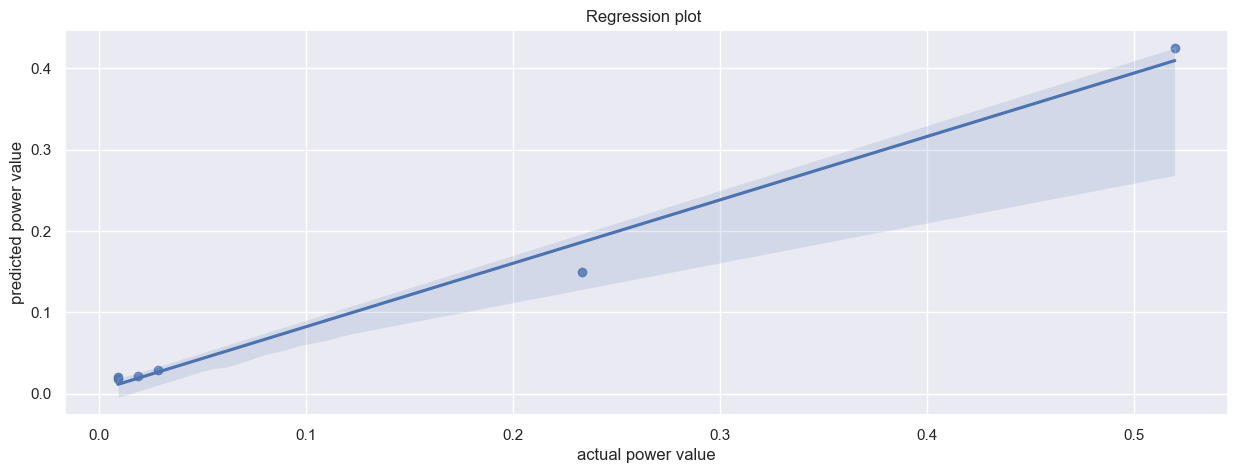

In [ ]:
sns.set(rc={'figure.figsize':(15,5)})
sns.regplot(x=y_test,y=y_pred)
plt.xlabel('actual power value')
plt.ylabel('predicted power value')
plt.title('Regression plot ')


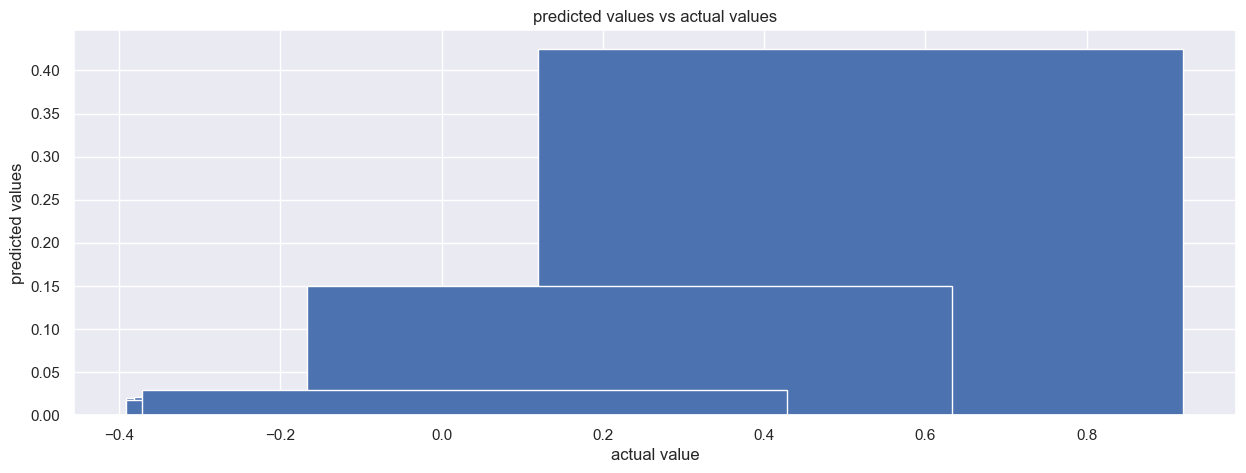

In [ ]:
plt.bar(y_test,y_pred)                                               #barplot which shows deviation from actual values to predicted values
plt.title("predicted values vs actual values")
plt.xlabel("actual value")
plt.ylabel("predicted values")
plt.show()

ERROR CHECKING 

In [ ]:
error_score=metrics.r2_score(y_test,y_pred)         #R2_score calculation
print(error_score)

0.9246061555796663


In [ ]:

print(metrics.mean_absolute_error(y_test,y_pred))


0.033610883333333334


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error,accuracy_score
mean_absolute_percentage_error(y_test,y_pred)


0.4804432283919256

In [ ]:
model.score(x_test,y_test)

NameError: name 'model' is not defined

In [ ]:
import pickle

In [ ]:
pickle_out=open("model.pkl","wb")
pickle.dump(model,pickle_out)
pickle_out.close()


In [ ]:
model.predict([[2,3,4,1,6,3,9,2,5]])

c:\Users\Mayur\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([0.0336334])

KeyboardInterrupt: 

In [ ]:
def predict_power(GATE,INV,NAND,AND,NOR,OR,IN,OUT):
    prediction=model.predict([[GATE,INV,NAND,AND,NOR,OR,IN,OUT]])
    print(prediction)
    return prediction

In [ ]:
def main():
    st.title("Power estimation App")
    nand=st.text_input("enter the number of nand gates")

    
    
